# Algoritmos de clustering



#**Datos nutricionales del menú de Burger King**
Este conjunto de datos es una recopilación completa de información nutricional de los principales elementos del menú que ofrece Burger King. El conjunto de datos incluye información sobre la cantidad de calorías, grasas totales, grasas saturadas, grasas trans, colesterol, sodio, carbohidratos totales y proteínas que se encuentran en cada elemento del menú.

Esta información permite a las personas tomar decisiones informadas sobre su ingesta dietética y les ayuda a gestionar mejor su salud y bienestar.

https://www.kaggle.com/datasets/mattop/burger-king-menu-nutrition-data/data

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv('/content/burger-king-menu.csv')



In [2]:
data

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Barbecue Dipping Sauce (1 oz),Breakfast,40.0,0.0,0.0,0.0,0.0,0.0,310.0,11.0,0.0,10.0,0.0,50.0
73,Ranch Dipping Sauce (1 oz),Breakfast,140.0,140.0,15.0,2.5,0.0,10.0,85.0,1.0,0.0,1.0,1.0,143.0
74,Buffalo Dipping Sauce (1 oz),Breakfast,80.0,70.0,8.0,1.5,0.0,5.0,360.0,2.0,0.0,1.0,0.0,83.0
75,Zesty Onion Ring Dipping Sauce (1 oz),Breakfast,150.0,140.0,15.0,2.5,0.0,20.0,240.0,3.0,0.0,0.0,0.0,153.0


In [3]:
data.isnull().sum()

Item                 0
Category             0
Calories             0
Fat Calories         0
Fat (g)              0
Saturated Fat (g)    0
Trans Fat (g)        0
Cholesterol (mg)     0
Sodium (mg)          0
Total Carb (g)       0
Dietary Fiber (g)    0
Sugars (g)           0
Protein (g)          0
Weight Watchers      0
dtype: int64

In [4]:
data.describe()

,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,501.428571,278.311688,30.967532,9.805195,0.636364,101.753247,993.246753,35.181818,1.779221,6.636364,20.909091,497.064935
std,307.612685,184.393762,20.535966,8.118431,1.128682,97.958659,613.426403,20.716588,1.690713,6.973463,17.145033,302.238070
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000
25%,260.000000,140.000000,16.000000,3.500000,0.000000,25.000000,470.000000,26.000000,1.000000,1.000000,12.000000,252.000000
50%,430.000000,250.000000,28.000000,8.000000,0.000000,70.000000,1010.000000,30.000000,1.000000,6.000000,17.000000,416.000000
75%,700.000000,380.000000,42.000000,14.000000,0.500000,175.000000,1420.000000,49.000000,2.000000,10.000000,28.000000,690.000000
max,1220.000000,750.000000,84.000000,33.000000,4.500000,390.000000,2840.000000,110.000000,9.000000,40.000000,71.000000,1192.000000


In [5]:
data.columns

Index(['Item', 'Category', 'Calories', 'Fat Calories', 'Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Total Carb (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)',
       'Weight Watchers'],
      dtype='object')

In [113]:
#Seleccione las columnas de Grasas totales y total de carbohidratos .
X =  data.iloc[:, [4, 9]].values
X[0:5]

array([[40., 49.],
       [46., 50.],
       [51., 50.],
       [58., 49.],
       [64., 50.]])

In [114]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler()
X_std=X_s.fit_transform(X)
X_std[0:5]

array([[0.44272071, 0.67138438],
       [0.73680693, 0.71997141],
       [0.98187878, 0.71997141],
       [1.32497937, 0.67138438],
       [1.61906559, 0.71997141]])

## **Algoritmo K-means**

In [221]:
# Clase KMeans de la biblioteca sklearn.
from sklearn.cluster import KMeans
#En lugar de seleccionar los centroides iniciales de forma aleatoria, "k-means++"
#utiliza un enfoque más sofisticado basado en una distribución de probabilidad.
# n_init=10 :Número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide.
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10, random_state=0 )

In [222]:
kmeans.n_clusters

2

In [225]:
y_kmeans = kmeans.fit_predict(X_std)

In [226]:
# Obtener los centroides estandarizados
centroides_estandarizados = kmeans.cluster_centers_

# Transformación inversa de los centroides para obtener los valores originales
centroides_originales = X_s.inverse_transform(centroides_estandarizados)

In [227]:
type(y_kmeans)

numpy.ndarray

In [228]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [229]:
data['cluster'] = y_kmeans
data.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers,cluster
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0,1
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0,1
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0,1
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0,1
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0,1


In [230]:
print(y_kmeans.shape)
print(y_kmeans.dtype)

(77,)
int32


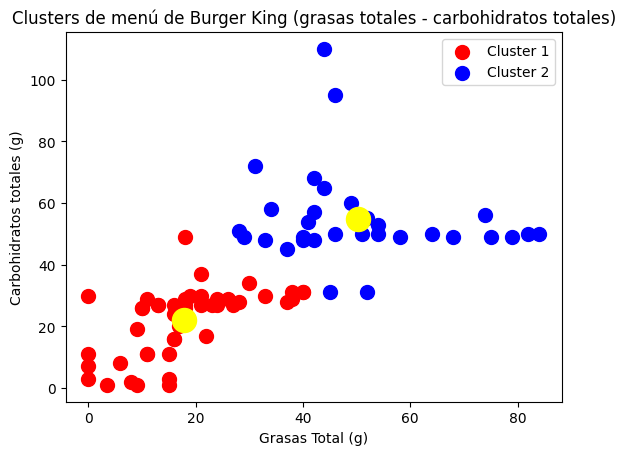

In [234]:
#Visualizando los clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')

#Traza el centroide. Esta vez vamos a utilizar los centros de cluster.
#atributo que devuelve aquí las coordenadas del centroide.
plt.legend()
plt.scatter(centroides_originales[:, 0], centroides_originales[:, 1], s=300, c='yellow', label = 'Centros')
plt.title('Clusters de menú de Burger King (grasas totales - carbohidratos totales)')
plt.xlabel('Grasas Total (g)')
plt.ylabel('Carbohidratos totales (g)')
plt.show()

In [235]:
rCluster1 = data[data['cluster'] == 0]
rCluster1.head(1)

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers,cluster
7,Whopper JR.® Sandwich,Burgers,310.0,160.0,18.0,5.0,0.5,40.0,390.0,27.0,1.0,7.0,13.0,309.0,0


In [236]:
rCluster2 = data[data['cluster'] == 1]
rCluster2.head(1)

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers,cluster
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0,1


### **Métrica Silhouette Score**
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Calcule el coeficiente de silueta medio de todas las muestras.

In [232]:
silhouette_score(X_std, y_kmeans)

0.5292698207237178

### **Métrica  Davies-Bouldin Index**

Es una métrica de validación que se utiliza para evaluar modelos de agrupación.

https://www.geeksforgeeks.org/davies-bouldin-index/

In [233]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_std, y_kmeans)

0.6861412675645467

## **DBSCAN**

In [238]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN().fit(X_std)
labels=clustering.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  0,  0,  1,  0,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1])

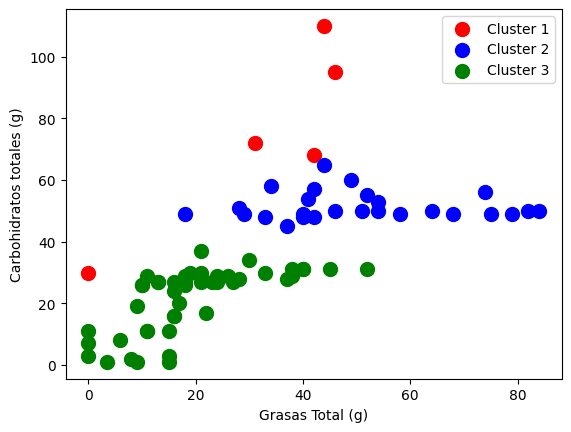

In [239]:
#Visualizando los clusters
plt.scatter(X[labels==-1, 0], X[labels==-1, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=100, c='green', label ='Cluster 3')


#Traza el centroide. Esta vez vamos a utilizar los centros de cluster.
#atributo que devuelve aquí las coordenadas del centroide.
plt.legend()
plt.xlabel('Grasas Total (g)')
plt.ylabel('Carbohidratos totales (g)')
plt.show()

### **Métrica Silhouette Score**
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Calcule el coeficiente de silueta medio de todas las muestras.

In [240]:
silhouette_score(X_std, labels)

0.4653539616416159

### **Métrica  Davies-Bouldin Index**

Es una métrica de validación que se utiliza para evaluar modelos de agrupación.

https://www.geeksforgeeks.org/davies-bouldin-index/

In [241]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_std, labels)

1.1864415000593997

## **Agglomerative Clustering**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [215]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering().fit(X_std)
clustering

AgglomerativeClustering()

In [216]:
labels1=clustering.labels_
labels1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

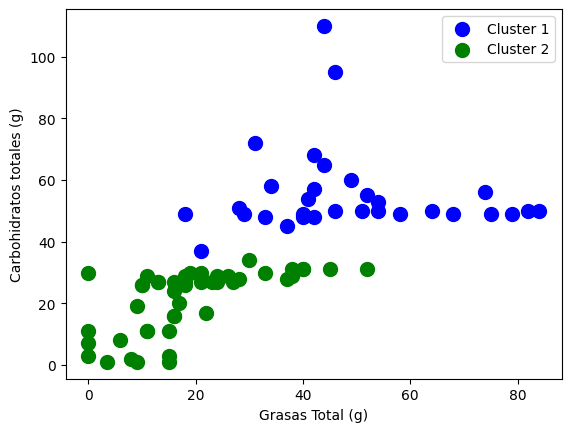

In [218]:
#Visualizando los clusters
plt.scatter(X[labels1==0, 0], X[labels1==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X[labels1==1, 0], X[labels1==1, 1], s=100, c='green', label ='Cluster 2')


#Traza el centroide. Esta vez vamos a utilizar los centros de cluster.
#atributo que devuelve aquí las coordenadas del centroide.
plt.legend()
plt.xlabel('Grasas Total (g)')
plt.ylabel('Carbohidratos totales (g)')
plt.show()

### **Métrica Silhouette Score**
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Calcule el coeficiente de silueta medio de todas las muestras.

In [219]:
silhouette_score(X_std, labels1)

0.5013492135531722

### **Métrica  Davies-Bouldin Index**

Es una métrica de validación que se utiliza para evaluar modelos de agrupación.

https://www.geeksforgeeks.org/davies-bouldin-index/

In [220]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_std, labels1)

0.7290251752161105

# Algoritmo de visión computacional

# **Imágenes de perros y gatos para clasificación**
Este conjunto de datos abarca una colección de imágenes seleccionadas específicamente con el fin de clasificar entre perros y gatos.

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pandas as pd

from matplotlib import pyplot as plt

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
model = ResNet50(weights='imagenet')
target_size=(224, 224)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [3]:
Image_size = (128, 128)

batch_size = 32
epochs = 10
channels = 3

In [7]:
data1 = pd.read_csv("archive\cat_dog.csv")

data1.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [8]:
print("isnull: \n",data1.isnull().sum())

isnull: 
 image     0
labels    0
dtype: int64


In [9]:
print(data1.duplicated().sum())

0


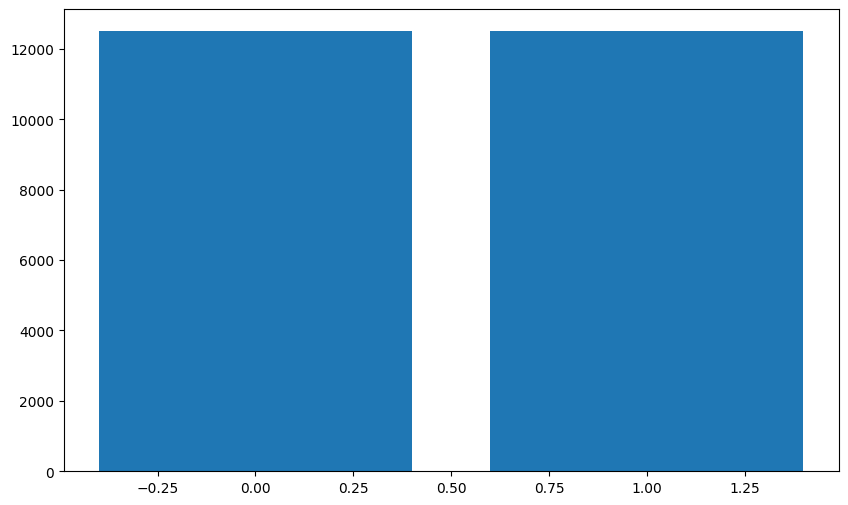

In [10]:
plt.figure(figsize=(10,6))
plt.bar(data1['labels'].value_counts().index, data1['labels'].value_counts())
plt.show()

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import pandas as pd
import os

# Ruta al archivo CSV que contiene los nombres de archivo y etiquetas
csv_file = 'archive\cat_dog.csv'
# Lee el archivo CSV
df = pd.read_csv(csv_file)


In [21]:
# Define las transformaciones de las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Cambia el tamaño de las imágenes a 224x224
    transforms.ToTensor(),  # Convierte las imágenes a tensores
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normaliza las imágenes
])

In [ ]:
import os
data_dir = 'archive\cat_dog'
# Lista para almacenar las rutas de todas las imágenes
all_images = []

# Itera sobre las subcarpetas en data_dir
for class_folder in os.listdir(data_dir):
    class_folder_path = os.path.join(data_dir, class_folder)
    # Verifica si el elemento es una carpeta
    if os.path.isdir(class_folder_path):
        # Itera sobre las imágenes dentro de la subcarpeta
        for img_filename in os.listdir(class_folder_path):
            # Verifica si el elemento es un archivo de imagen válido
            if img_filename.endswith(('.jpg', '.jpeg', '.png')):
                # Agrega la ruta completa de la imagen a la lista
                img_path = os.path.join(class_folder_path, img_filename)
                all_images.append(img_path)

# Verifica las rutas de las imágenes recopiladas
#print(all_images)

In [5]:
import random
import os
import shutil

# Barajar las imágenes
random.shuffle(all_images)

# Porcentaje de imágenes para entrenamiento y prueba
train_percentage = 0.8
test_percentage = 1 - train_percentage

# Calcula la cantidad de imágenes para entrenamiento y prueba
num_train_images = int(len(all_images) * train_percentage)
num_test_images = len(all_images) - num_train_images

# Divide las imágenes en conjuntos de entrenamiento y prueba
train_images = all_images[:num_train_images]
test_images = all_images[num_train_images:]

In [33]:
print("Rutas de imágenes de entrenamiento:")
for img_path in train_images[:5]:  # Imprimir las primeras 5 rutas
    print(img_path)

print("\nRutas de imágenes de prueba:")
for img_path in test_images[:5]:  # Imprimir las primeras 5 rutas
    print(img_path)


Rutas de imágenes de entrenamiento:
archive\cat_dog\1\dog.3212.jpg
archive\cat_dog\0\cat.9687.jpg
archive\cat_dog\1\dog.1124.jpg
archive\cat_dog\0\cat.5777.jpg
archive\cat_dog\0\cat.5336.jpg

Rutas de imágenes de prueba:
archive\cat_dog\1\dog.12017.jpg
archive\cat_dog\0\cat.554.jpg
archive\cat_dog\0\cat.1046.jpg
archive\cat_dog\1\dog.12132.jpg
archive\cat_dog\0\cat.2409.jpg


In [39]:
train_size = len(train_images)
test_size = len(test_images)

print("Tamaño del conjunto de entrenamiento:", train_size)
print("Tamaño del conjunto de prueba:", test_size)


Tamaño del conjunto de entrenamiento: 20000
Tamaño del conjunto de prueba: 5000


In [40]:
all_images_size = len(all_images)
print("Tamaño de all_images:", all_images_size)


Tamaño de all_images: 25000


In [47]:


# Rutas a los directorios de entrenamiento y prueba
train_dir = os.path.join('archive', 'cat_dog', 'train')
test_dir = os.path.join('archive', 'cat_dog', 'test')
# Define el batch size
batch_size = 4

# Define el conjunto de datos de entrenamiento
trainset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Define el conjunto de datos de prueba
testset = torchvision.datasets.ImageFolder(root=test_dir, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Obtener las clases
classes = trainset.classes

print("Clases:", classes)
print("Tamaño del conjunto de entrenamiento:", len(trainset))
print("Tamaño del conjunto de prueba:", len(testset))


Clases: ['cat', 'dog']
Tamaño del conjunto de entrenamiento: 20000
Tamaño del conjunto de prueba: 5000


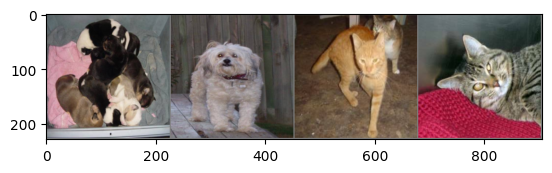

dog   dog   cat   cat  


In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Define una función para mostrar una imagen
def imshow(img):
    # Desnormaliza la imagen
    img = img / 2 + 0.5
    # Convierte de Tensor a NumPy
    npimg = img.numpy()
    # Cambia el orden de los ejes para que sea compatible con matplotlib
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # Muestra la imagen
    plt.show()

# Obtiene algunas imágenes de entrenamiento aleatorias
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Muestra las imágenes
imshow(torchvision.utils.make_grid(images))
# Imprime las etiquetas
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Ajuste las dimensiones de las capas lineales para que sean compatibles con la salida de las capas convolucionales
        self.fc1 = nn.Linear(16 * 53 * 53, 120)  # Ajuste el tamaño de entrada
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Aplanar todas las dimensiones excepto el lote
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


In [74]:
import torch.optim as optim

# Definir la función de pérdida (CrossEntropyLoss para clasificación)
criterion = nn.CrossEntropyLoss()

# Definir el optimizador (SGD con impulso)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [75]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [76]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [77]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Obtener las entradas; los datos son una lista de [entradas, etiquetas]
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # Reiniciar los gradientes de los parámetros
        optimizer.zero_grad()

        # Hacer la propagación hacia adelante + hacia atrás + optimizar
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Imprimir estadísticas
        running_loss += loss.item()
        if i % 2000 == 1999:    # imprimir cada 2000 mini-lotes
            print(f'[{epoch + 1}, {i + 1:5d}] pérdida: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Entrenamiento terminado')



[1,  2000] pérdida: 0.735
[1,  4000] pérdida: 0.670
[2,  2000] pérdida: 0.611
[2,  4000] pérdida: 0.581
Entrenamiento terminado


In [78]:
# Define la ruta del archivo donde deseas guardar los pesos del modelo
PATH = './cifar_net_cat_dog.pth'

# Guarda los pesos del modelo en el archivo
torch.save(net.state_dict(), PATH)


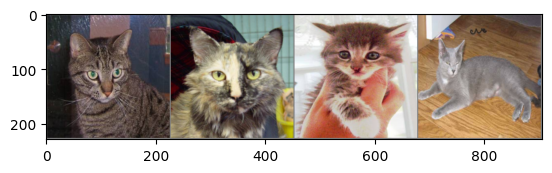

GroundTruth:  cat   cat   cat   cat  


In [79]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Mostrar imágenes
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(images))))


In [80]:
# Define la red neuronal
net = Net()

# Carga los pesos guardados del modelo
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [81]:
# Obtener las predicciones de la red neuronal para las imágenes de prueba
outputs = net(images)


In [82]:
# Obtener el índice de la clase con la energía más alta
_, predicted = torch.max(outputs, 1)

# Imprimir las predicciones de la red neuronal entrenada
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


Predicted:  cat   cat   dog   cat  


In [85]:
correct = 0
total = 0
# Como no estamos entrenando, no necesitamos calcular los gradientes para nuestras salidas
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calcular las salidas pasando las imágenes a través de la red
        outputs = net(images)
        # La clase con la energía más alta es lo que elegimos como predicción
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Precisión de la red en las 5000 imágenes de prueba: {100 * correct // total} %')


Precisión de la red en las 5000 imágenes de prueba: 72 %


In [86]:
# Preparar para contar predicciones para cada clase
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# Nuevamente, no necesitamos gradientes
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # Recolectar las predicciones correctas para cada clase
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# Imprimir precisión para cada clase
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Precisión para la clase: {classname:5s} es {accuracy:.1f} %')


Precisión para la clase: cat   es 72.3 %
Precisión para la clase: dog   es 72.2 %


### Desarrollo de algoritmos de ensamblado

## **Titanic_Sobrevivientes**
https://www.kaggle.com/code/macespinoza/classification-decision-trees-and-k-nearest/input?select=titanic_train.csv

Este conjunto de datos contiene 891 datos donde hay la siguientes columnas:
- ID del pasajero
- Sobrevivió
- clase p
- Nombre
- Sexo
- Edad
- SibSp
- Tostar
- Boleto
- Tarifa

In [159]:
data2=pd.read_csv('titanic_train.csv')
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
len(data2)

891

#### Predice de que clase es sabiendo si Sobrevivió y tarifa

In [172]:
from sklearn.model_selection import train_test_split
X = data2[['Survived','Fare']]  # Asegúrate de seleccionar las características adecuadas
y = data2['Pclass']
# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Random Forest:**

In [173]:
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Predicción en el conjunto de prueba
predictions_rf = rf_classifier.predict(X_test)

In [174]:
y_test.head(10)

709    3
439    2
840    3
720    2
39     3
290    1
300    3
333    3
208    3
136    1
Name: Pclass, dtype: int64

In [175]:
predictions_rf[:10]

array([3, 2, 3, 2, 3, 1, 3, 3, 3, 1], dtype=int64)

In [176]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_rf)
accuracy

0.9273743016759777

In [177]:
from sklearn.metrics import precision_score
#Calcula la precisión para cada clase individualmente y luego toma la media.
precision = precision_score(y_test, predictions_rf, average='macro')
print(precision)


0.9064928801284028


### **Gradient Boosting:**

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el clasificador de Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo
gb_classifier.fit(X_train, y_train)

# Predicción en el conjunto de prueba
predictions_gb = gb_classifier.predict(X_test)


In [ ]:
y_test.head(10)

709      male
439      male
840      male
720    female
39     female
290    female
300    female
333      male
208    female
136    female
Name: Sex, dtype: object

In [ ]:
predictions_gb[:10]

array(['female', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_gb)
accuracy

0.7821229050279329

In [181]:
from sklearn.metrics import precision_score
#Calcula la precisión para cada clase individualmente y luego toma la media.
precision = precision_score(y_test, predictions_gb, average='macro')
print(precision)

0.9386352479135985


### **XGBoost:**

In [197]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Codificar las clases ('female =0' y 'male=1')
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Crear el clasificador de XGBoost
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Entrenar el modelo
xgb_classifier.fit(X_train, y_train_encoded)

# Predicción en el conjunto de prueba
predictions_xgb = xgb_classifier.predict(X_test)


In [198]:
y_test.head(10)

709    3
439    2
840    3
720    2
39     3
290    1
300    3
333    3
208    3
136    1
Name: Pclass, dtype: int64

In [199]:
predictions_xgb[:10]

array([2, 1, 2, 1, 2, 0, 2, 2, 2, 1], dtype=int64)

In [200]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_xgb)
accuracy

0.0335195530726257

In [201]:
from sklearn.metrics import precision_score
#Calcula la precisión para cada clase individualmente y luego toma la media.
precision = precision_score(y_test, predictions_xgb, average='macro')
print(precision)


0.03729954180985109


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Combinar múltiples modelos**

https://inteligencia-artificial.dev/ensemble-learning-python/

In [192]:
from sklearn.ensemble import VotingClassifier

# Crear un clasificador de votación suave
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier), ('gb', gb_classifier), ('xgb', xgb_classifier)], voting='soft')

# Entrenar el modelo de votación
voting_classifier.fit(X_train, y_train)

# Predicción en el conjunto de prueba
predictions_voting = voting_classifier.predict(X_test)


In [193]:
y_test.head(14)

709    3
439    2
840    3
720    2
39     3
290    1
300    3
333    3
208    3
136    1
137    1
696    3
485    3
244    3
Name: Pclass, dtype: int64

In [194]:
predictions_voting[:14]

array([3, 2, 3, 2, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3], dtype=int64)

In [195]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_voting)
accuracy

0.9497206703910615

In [196]:
from sklearn.metrics import precision_score
#Calcula la precisión para cada clase individualmente y luego toma la media.
precision = precision_score(y_test, predictions_voting, average='macro')
print(precision)

0.9330060629452727
